In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from cp_utils.cp_dir_file_ops import define_env

if define_env() == 'SERVER':
    dir = '/home/neo/PycharmProjects/Course1/subprojects/sp02_omniiseg_fgn_mmdet/COCO2VOC_Scratch_All_NK'
elif define_env() == 'PC':
    dir = 'C:/Users/Art/PycharmProjects/Course1/subprojects/sp02_omniiseg_fgn_mmdet/COCO2VOC_Scratch_All_NK'
else:
    raise NotImplementedError

tag = 'COCO_val_FT_Ignore_bbox_mAP_base_'

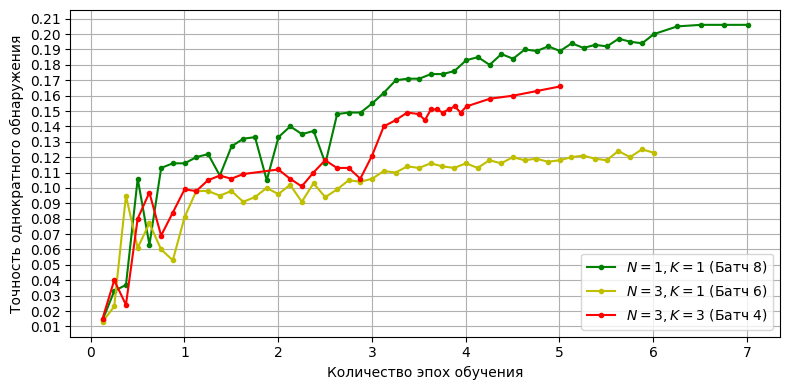

In [2]:
sp0 = f'N1_K1_B8_2022-02-25_06-03-56 Scratch LR 0.005 WD 1e-05 Adam NO-HDR-tag-{tag}.csv'
sp1 = f'N3_K1_B6_2022-02-25_05-55-49 Scratch LR 0.005 WD 1e-05 Adam NO-HDR-tag-{tag}.csv'
sp2 = f'N3_K3_B4_2022-02-25_05-32-18 Scratch LR 0.005 WD 1e-05 Adam NO-HDR-tag-{tag}.csv'

fp0 = os.path.join(dir, sp0)
fp1 = os.path.join(dir, sp1)
fp2 = os.path.join(dir, sp2)

# Wall time, Step, Value
data0 = np.around(np.loadtxt(fp0, delimiter=',', skiprows=1)[:, 2], decimals=3)
data1 = np.around(np.loadtxt(fp1, delimiter=',', skiprows=1)[:, 2], decimals=3)
data2 = np.around(np.loadtxt(fp2, delimiter=',', skiprows=1)[:, 2], decimals=3)

steps0 = np.around(np.loadtxt(fp0, delimiter=',', skiprows=1)[:, 1], decimals=3) * 8
steps1 = np.around(np.loadtxt(fp1, delimiter=',', skiprows=1)[:, 1], decimals=3) * 6
steps2 = np.around(np.loadtxt(fp2, delimiter=',', skiprows=1)[:, 1], decimals=3) * 4

fig = plt.figure(figsize=(8, 4), dpi=100, facecolor='white')

plt.ylabel('Точность однократного обнаружения')
accuracy = np.arange(50, dtype=np.int32) * 0.01
plt.yticks(accuracy)
# plt.ylim(0.0, 0.40)

plt.xlabel('Количество эпох обучения')
steps = np.arange(8, dtype=np.int32) * 98500
ticks = np.arange(8, dtype=np.int32)
plt.xticks(steps, ticks)

plt.plot(steps0, data0, 'g.-', label=r'$N = 1, K = 1$ (Батч 8)')
plt.plot(steps1, data1, 'y.-', label=r'$N = 3, K = 1$ (Батч 6)')
plt.plot(steps2, data2, 'r.-', label=r'$N = 3, K = 3$ (Батч 4)')

plt.grid(True)
# plt.legend(loc='upper left')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.title(f'Experiments with different learning rates $\gamma$')
plt.savefig('COCO2VOC_Scratch_All_NK_Final.png', facecolor=fig.get_facecolor(), edgecolor='none',
            transparent=False)
plt.show()
